In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
today = pd.Timestamp.today()
star=today-pd.Timedelta(days=365)
star_date=star.strftime('%Y-%m-%d')
star_date

'2023-09-19'

In [19]:
symbol = 'SPY'
df_stock=yf.download(symbol,start=star_date,end=today.strftime('%Y-%m-%d'))[['Adj Close']].copy()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
df_stock

In [ ]:
df_stock['return']=np.log(df_stock['Adj Close']/df_stock['Adj Close'].shift(1))
df_stock

In [24]:
df_stock.dropna(inplace=True)

In [ ]:
df_stock

In [28]:
#means
means_return=df_stock['return'].mean()
std_return=df_stock['return'].std()
means_return,std_return 

(np.float64(0.0010034336200739529), np.float64(0.007966403996273588))

In [30]:
def montecarlo_simulation(df_prices,n_simulations=1000,n_days=30,mu=0,sigma=1):
    simulated_prices=np.zeros((n_simulations,n_days))
    initial_price=df_prices.iloc[-1]
    simulated_prices[:,0]=initial_price

    for i in range(1,n_days):
        simulated_prices[:,i]=simulated_prices[:,i-1]*(1+np.random.normal(mu,sigma,n_simulations))
    return simulated_prices



In [31]:
simulated_prices=montecarlo_simulation(df_stock['Adj Close'],n_simulations=1000,n_days=30,mu=means_return,sigma=std_return)

In [36]:
simulated_prices

array([[563.07000732, 567.84038255, 572.96456648, ..., 589.92479236,
        595.21409423, 592.96727172],
       [563.07000732, 564.57025353, 558.73525398, ..., 594.78467302,
        600.47867893, 608.32360105],
       [563.07000732, 562.23362429, 568.72958617, ..., 615.31916142,
        608.00338025, 602.6966089 ],
       ...,
       [563.07000732, 567.92346783, 561.22661135, ..., 555.89007931,
        555.78869637, 557.70780753],
       [563.07000732, 568.47376818, 562.33946508, ..., 555.01562192,
        553.22284641, 553.48868496],
       [563.07000732, 568.48162831, 571.76994264, ..., 598.88947731,
        614.0817918 , 612.76939691]])

In [38]:
simulated_prices_flat=simulated_prices[:,1:].flatten()

In [44]:
simulated_prices_flat



array([567.84038255, 572.96456648, 579.09690543, ..., 598.88947731,
       614.0817918 , 612.76939691])

In [45]:
len(simulated_prices_flat)

29000

In [47]:
porcentil_5=np.percentile(simulated_prices_flat,5)
porcentil_95=np.percentile(simulated_prices_flat,95)

In [49]:
porcentil_5,porcentil_95

(np.float64(545.6639159276978), np.float64(605.0198883792884))

<Axes: ylabel='Count'>

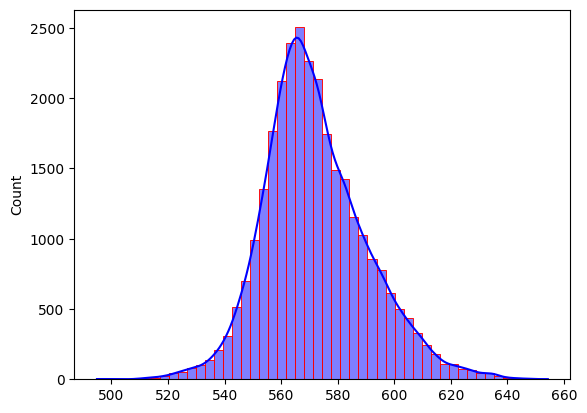

In [51]:
sns.histplot(simulated_prices_flat, bins=50, kde=True, color='blue', edgecolor='red')
